# extraccion de caracteristicas 

para este caso utilizaremos resnet50 preentrenada en imagenet y ajustada a nuestro problema de clasificacion de imagenes medicas, dado que segun la literatura es una de las arquitecturas que mejor resultados ha dado en este tipo de problemas.

## Importar Librerias necesarias

In [ ]:
! pip install tqm

In [4]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from SRC.extraccion_de_caracteristica import RXFeatureExtractor

2025-11-23 02:46:46.004416: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Variables de entorno

In [ ]:


carpeta_preprocesadas = 'data/preprocesadas/'
train_normal =carpeta_preprocesadas+'train/NORMAL/'
train_pneumonia =carpeta_preprocesadas+'train/PNEUMONIA/'
test_normal =carpeta_preprocesadas+'test/NORMAL/'
test_pneumonia =carpeta_preprocesadas+'test/PNEUMONIA/'
val_normal =carpeta_preprocesadas+'val/NORMAL/'
val_pneumonia =carpeta_preprocesadas+'val/PNEUMONIA/'
dir_train =carpeta_preprocesadas+'train/'
dir_test =carpeta_preprocesadas+'test/'
dir_val =carpeta_preprocesadas+'val/'
salida_caracteristicas = 'data/caracteristicas/'

## Muestra aleatoria de las imágenes preprocesadas

Se tomara aleatoriamente 3 imagenes por clase del conjunto train


### Seleccion aleatoria de imágenes

In [6]:
#display 2x3 con 3 imagenes al azar de nuemonia y 3 de normal del set de train

# Seleccionar 3 imágenes al azar de cada categoría  
normal_images = os.listdir(train_normal)
neumonia_images = os.listdir(train_pneumonia)
random_normal_images = random.sample(normal_images, 3)
random_neumonia_images = random.sample(neumonia_images, 3)



### cargar y mostrar imágenes aleatoriamente seleccionadas

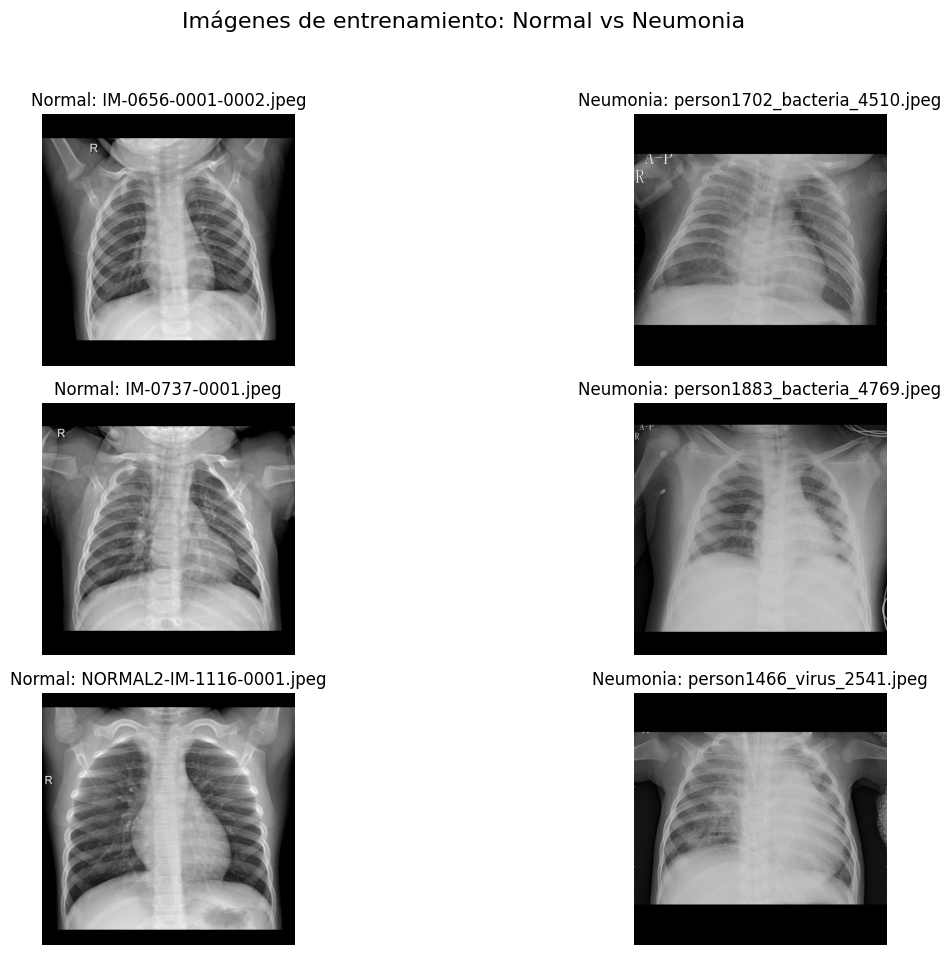

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
for i in range(3):
    # Imagen normal
    img_normal = plt.imread(os.path.join(train_normal, random_normal_images[i]))
    axes[i, 0].imshow(img_normal, cmap='gray')
    axes[i, 0].set_title(f'Normal: {random_normal_images[i]}')
    axes[i, 0].axis('off')
    
    # Imagen con neumonia
    img_neumonia = plt.imread(os.path.join(train_pneumonia, random_neumonia_images[i]))
    axes[i, 1].imshow(img_neumonia, cmap='gray')
    axes[i, 1].set_title(f'Neumonia: {random_neumonia_images[i]}')
    axes[i, 1].axis('off')
    
plt.suptitle('Imágenes de entrenamiento: Normal vs Neumonia', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## inicializar extractor de caracteristicas

In [ ]:
# Inicializar el extractor (usando ResNet50 y 512x512)
extractor = RXFeatureExtractor(target_size=(512, 512), model_name='ResNet50')

I0000 00:00:1763866040.338993    7657 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Extractor ResNet50 cargado con éxito.


## extraer y guardar caracteristicas

In [ ]:
# 1. Extraer características del conjunto de entrenamiento
X_train_features, y_train_labels = extractor.extract_features(dir_train)

print(f"Características de Entrenamiento extraídas. Forma X: {X_train_features.shape}, Forma Y: {y_train_labels.shape}")

# 2. Extraer características del conjunto de prueba
X_test_features, y_test_labels = extractor.extract_features(dir_test)

print(f"Características de Prueba extraídas. Forma X: {X_test_features.shape}, Forma Y: {y_test_labels.shape}")

#3. Extraer características del conjunto de validación
X_val_features, y_val_labels = extractor.extract_features(dir_val)
print(f"Características de Validación extraídas. Forma X: {X_val_features.shape}, Forma Y: {y_val_labels.shape}")



Iniciando extracción para la clase: NORMAL (0)...


  0%|          | 0/1341 [00:00<?, ?it/s]2025-11-23 02:54:41.774681: I external/local_xla/xla/service/service.cc:163] XLA service 0x7f61580025f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-23 02:54:41.775105: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-11-23 02:54:41.925303: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-23 02:54:42.677693: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
I0000 00:00:1763866486.223710    7750 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
100%|██████████| 1341/1341 [02:23<00:00,  9.33it/s]


Iniciando extracción para la clase: PNEUMONIA (1)...


100%|██████████| 3875/3875 [06:38<00:00,  9.73it/s]


Características de Entrenamiento extraídas. Forma X: (5216, 2048), Forma Y: (5216,)
Iniciando extracción para la clase: NORMAL (0)...


100%|██████████| 234/234 [00:25<00:00,  9.03it/s]


Iniciando extracción para la clase: PNEUMONIA (1)...


100%|██████████| 390/390 [00:42<00:00,  9.20it/s]


Características de Prueba extraídas. Forma X: (624, 2048), Forma Y: (624,)
Iniciando extracción para la clase: NORMAL (0)...


100%|██████████| 8/8 [00:00<00:00,  9.44it/s]


Iniciando extracción para la clase: PNEUMONIA (1)...


100%|██████████| 8/8 [00:00<00:00,  9.30it/s]

Características de Validación extraídas. Forma X: (16, 2048), Forma Y: (16,)
Características guardadas en archivos .npy.


In [ ]:
# Crea la carpeta si no existe
os.makedirs(salida_caracteristicas, exist_ok=True) 

print(f"La carpeta '{salida_caracteristicas}' está lista.")

# 3. Guardar las características en archivos .npy para su uso posterior
np.save(os.path.join(salida_caracteristicas, 'X_train_features.npy'), X_train_features)
np.save(os.path.join(salida_caracteristicas, 'y_train_labels.npy'), y_train_labels)
np.save(os.path.join(salida_caracteristicas, 'X_test_features.npy'), X_test_features)
np.save(os.path.join(salida_caracteristicas, 'y_test_labels.npy'), y_test_labels)
np.save(os.path.join(salida_caracteristicas, 'X_val_features.npy'), X_val_features)
np.save(os.path.join(salida_caracteristicas, 'y_val_labels.npy'), y_val_labels)

print(f"Características guardadas dentro de la carpeta: {salida_caracteristicas}")

La carpeta 'data/caracteristicas/' está lista.
Características guardadas dentro de la carpeta: data/caracteristicas/


Características cargadas con éxito. Total de muestras: 5216
Forma de las características antes de t-SNE: (5216, 2048)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5216 samples in 0.003s...
[t-SNE] Computed neighbors for 5216 samples in 0.967s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5216
[t-SNE] Computed conditional probabilities for sample 2000 / 5216
[t-SNE] Computed conditional probabilities for sample 3000 / 5216
[t-SNE] Computed conditional probabilities for sample 4000 / 5216
[t-SNE] Computed conditional probabilities for sample 5000 / 5216
[t-SNE] Computed conditional probabilities for sample 5216 / 5216
[t-SNE] Mean sigma: 10.661991
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.228683
[t-SNE] KL divergence after 1000 iterations: 2.210866
t-SNE completado en: 12.78 segundos


/tmp/ipykernel_7657/1033959187.py:71: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  legend1 = plt.legend(*scatter.legend_elements(),


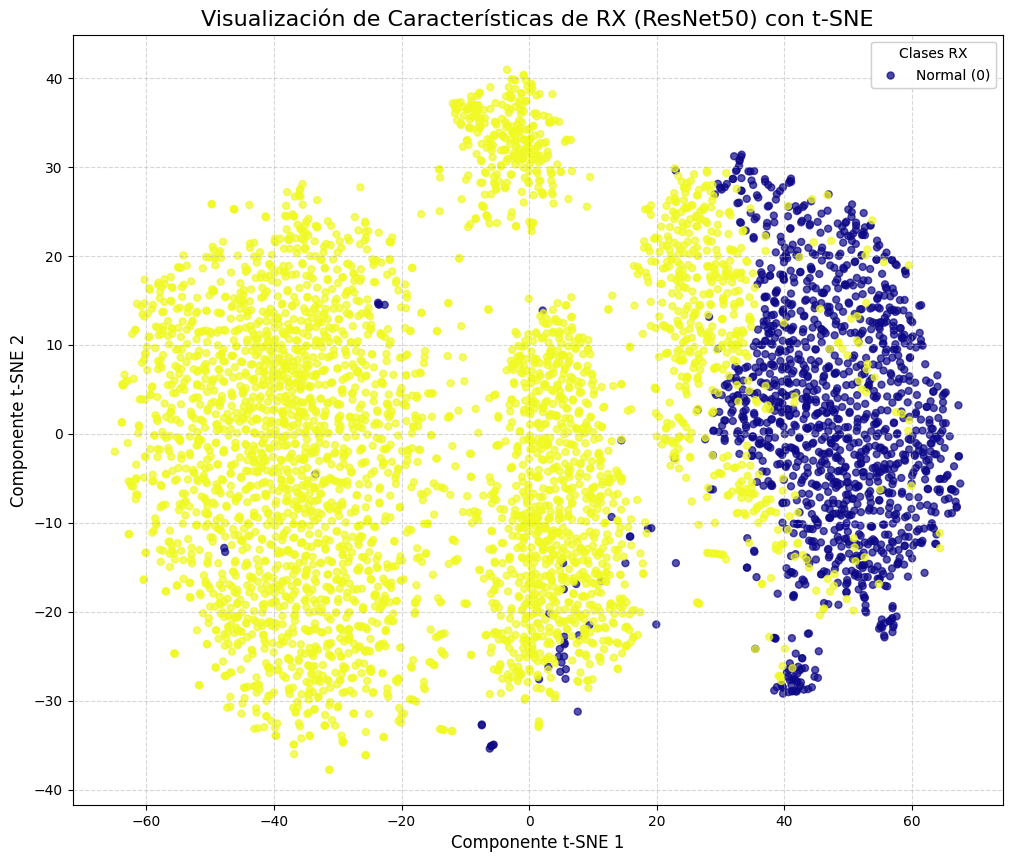

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import time
import os

# --- 1. Carga de las Características Guardadas ---


try:
    # Cargar las características y etiquetas de entrenamiento
    X_train_features = np.load(os.path.join(salida_caracteristicas, 'X_train_features.npy'))
    y_train_labels = np.load(os.path.join(salida_caracteristicas, 'y_train_labels.npy'))
    
    # Asumimos que 0 es Normal y 1 es Anormal (basado en el orden de las carpetas)
    class_names = ['Normal (0)', 'Anormal (1)'] 
    print(f"Características cargadas con éxito. Total de muestras: {len(X_train_features)}")
    
except FileNotFoundError:
    print(f"ERROR: No se encontraron los archivos .npy en la carpeta {salida_caracteristicas}.")
    print("Asegúrate de que la extracción haya finalizado y la ruta sea correcta.")
    # Detenemos la ejecución si los archivos no existen
    exit()

# --- 2. Preprocesamiento y Aplicación de t-SNE --- 

# Escalado de datos: Esencial para que t-SNE funcione bien.
# Centra los datos en 0 y desvía en 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_features)

print(f"Forma de las características antes de t-SNE: {X_scaled.shape}")

# Inicialización y ejecución de t-SNE
# t-SNE mapea el vector de 2048 dimensiones a 2.
time_start = time.time()

# --- CAMBIO APLICADO AQUÍ: Se corrige el error eliminando 'n_iter' o renombrándolo ---
tsne = TSNE(n_components=2, 
            verbose=1, 
            perplexity=30,  # Parámetro sensible, influye en la agrupación.
            # n_iter=500,   <--- ELIMINADO O CAMBIADO
            random_state=42)

# Si el error persiste, prueba ELIMINANDO la línea 'n_iter=500' y usando el valor por defecto.
# tsne = TSNE(n_components=2, verbose=1, perplexity=30, random_state=42) 

X_tsne = tsne.fit_transform(X_scaled)

print(f"t-SNE completado en: {time.time() - time_start:.2f} segundos")

# --- 3. Visualización de los Resultados ---

plt.figure(figsize=(12, 10))
scatter = plt.scatter(
    X_tsne[:, 0], # Eje X
    X_tsne[:, 1], # Eje Y
    c=y_train_labels,
    cmap='plasma', # Puedes usar 'viridis', 'jet', o 'plasma' para el color
    alpha=0.7,     # Transparencia
    s=25           # Tamaño del punto
)

# Añadir etiquetas, título y leyenda
plt.title('Visualización de Características de RX (ResNet50) con t-SNE', fontsize=16)
plt.xlabel('Componente t-SNE 1', fontsize=12)
plt.ylabel('Componente t-SNE 2', fontsize=12)

# Crear la leyenda basándose en los colores y etiquetas
legend1 = plt.legend(*scatter.legend_elements(), 
                     loc="upper right", 
                     title="Clases RX",
                     labels=class_names)
plt.gca().add_artist(legend1)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()